In [ ]:
"""1. Distance between PDFs: In this question you will explore the other “distances” between PDFs dis-
cussed in class. To verify the implementation of these distances, use the normalized histogram of the
stereo image pair (left.png, right.png) used in the previous assignment.
(a) Cross Entropy (CE): The cross entropy between two PDFs (PMFs) p and q is given by: H ( p, q ) =
H ( p ) + D ( p || q ) where H ( p ) is the entropy of p and D ( p || q ) is the KL divergence between p and
q. Write a function that accepts two PDFs (PMFs) p, q and outputs the CE between them.
i. Verify your function using the stereo image normalized histogram pair. (1)
ii. As with the KL divergence problem, choose a fixed PMF p ∼ Bern ( r ) . Choose another PMF
q ∼ Bern ( s ) where s can be varied. Plot H ( p, q ) as a function of s. From the plot, does
minimizing H ( p, q ) give us matched PMFs? (1)
(b) Jensen Shannon (JS) Divergence: The definition of JS divergence between two PDFs p and q is
p + q
given by: J ( p, q ) = D ( p || m ) + D ( q || m ) where m = 2 and D ( p || q ) is the KL divergence be-
tween p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the JS divergence
between them. Verify that the JS ( p, q ) is symmetric indeed while D ( p || q ) is not. Again, use the
normalized histograms of the stereo image pair. (1)
(c) Wasserstein Distance: The Wasserstein-1 distance between two PDFs r and s is given by: W 1 ( r, s ) =
inf E ( x,y )∼ π | x − y | . The set Π ( r, s ) is composed of all bivariate joint PDFs whose marginals
π ∈ Π ( r,s )
equal r and s. Given a tuple (p ( X,Y ) , r X , s Y ) of a joint histogram p ( X,Y ) , and marginals r X , s Y ,
write a function that accepts this tuple and checks if p X,Y ∈ Π ( r, s ) . Verify your function with a
positive example and a negative example. (2)"""


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def kl_divergence(p, q):
    # Ensure that both p and q are NumPy arrays with the same shape
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    # Ensure that the arrays have the same shape
    if p.shape != q.shape:
        raise ValueError("Input vectors must have the same shape.")

    # Avoid division by zero and log of zero by adding a small epsilon
    epsilon = 1e-10

    # Calculate the KL divergence
    kl = np.sum(p * np.log((p + epsilon) / (q + epsilon)))

    return kl

def entropy(pmf_matrix):
    pmf_matrix = np.array(pmf_matrix)
    
    # Filter out zero probabilities
    non_zero_entries = pmf_matrix[pmf_matrix > 0] 

    # Calculate entropy values
    entropy_values = -non_zero_entries * np.log2(non_zero_entries)

    # Sum up the entropy values
    entropy_sum = np.sum(entropy_values)
    
    return entropy_sum

def Cross_Entropy(p,q):

    CE = entropy(p) + kl_divergence(p, q)

    return CE
    
def calculate_histogram(image):
    # Initialize histogram with 256 bins (0-255)
    histogram = [0] * 256  
    
    for row in image:
        for value in row:
            histogram[value] += 1
    return histogram

In [5]:
# Open an image file

left = cv2.imread('left.png')
right = cv2.imread('right.png')

if left is not None:
    height1, width1, channels1 = left.shape
    height2, width2, channels2 = right.shape
else:
    print("Failed to load image.")
image_1 = left[:,:,0]
image_2 = right[:,:,0]

In [14]:
# pmf of left and right image files

histogram_image_1 = calculate_histogram(image_1)
histogram_image_2 = calculate_histogram(image_2)
pmf_1 = np.array(histogram_image_1)/ (height1*width1)
pmf_2 = np.array(histogram_image_2)/ (height2*width2)

In [15]:
CE = Cross_Entropy(pmf_1,pmf_2)
CE_self = Cross_Entropy(pmf_1,pmf_1)

In [16]:
print('cross Entropy of left and Right images = ',CE)

cross Entropy of left and Right images =  7.268763409252692


In [25]:
"""As with the KL divergence problem, choose a fixed PMF p ∼ Bern ( r ) . Choose another PMF
q ∼ Bern ( s ) where s can be varied. Plot H ( p, q ) as a function of s. From the plot, does
minimizing H ( p, q ) give us matched PMFs?"""

# q ∼ Bern(s) and p ~ Bern(r)
# Fixing r
r = 0.6
N = 100
# Varying s
s = np.linspace(0,1,N)

H_p_q = []

for i in s:
    p = np.array([r,1-r]).T
    q = np.array([i,1-i]).T

    H_pq = Cross_Entropy(p,q)

    H_p_q.append(H_pq)

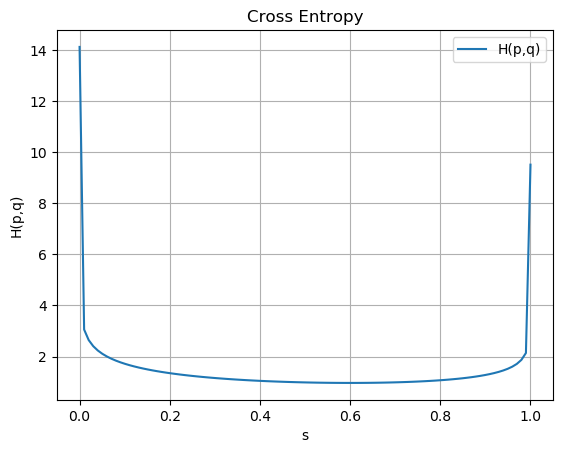

In [30]:
# plot D(p||q) and D(q||q)
plt.plot(s,H_p_q, label = 'H(p,q)')
plt.xlabel('s')
plt.ylabel('H(p,q)')
plt.title('Cross Entropy')
plt.grid(True)
plt.legend()
plt.show()


In [61]:
"""Jensen Shannon (JS) Divergence: The definition of JS divergence between two PDFs p and q is p + q
given by: J ( p, q ) = D ( p || m ) + D ( q || m ) where m = 2 and D ( p || q ) is the KL divergence be-
tween p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the JS divergence
between them. Verify that the JS ( p, q ) is symmetric indeed while D ( p || q ) is not. Again, use the
normalized histograms of the stereo image pair. (1)"""

def Jenson_Shannon_Divergence(p,q):
    m = 1
    epsilon = 1e-10
    # Calculate KL Divergence of p from m and q from m
    kl_p_m = np.sum(p * np.log((p + epsilon) / (m + epsilon)))
    kl_q_m = np.sum(q * np.log((q + epsilon) / (m + epsilon)))
        
    # Calculate Jenson-Shannon Divergence
    jsd = (kl_p_m + kl_q_m)

    return jsd

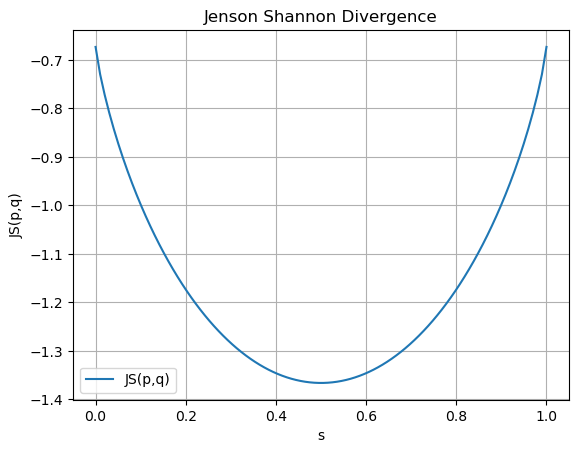

In [62]:
JSD_p_q = []
for i in s:
    p = np.array([r,1-r]).T
    q = np.array([i,1-i]).T

    JS_pq = Jenson_Shannon_Divergence(p,q)

    JSD_p_q.append(JS_pq)

# plot D(p||q) and D(q||q)
plt.plot(s,JSD_p_q, label = 'JS(p,q)')
plt.xlabel('s')
plt.ylabel('JS(p,q)')
plt.title('Jenson Shannon Divergence')
plt.grid(True)
plt.legend()
plt.show()

In [59]:
JSD = Jenson_Shannon_Divergence(pmf_1,pmf_2)
KLD = kl_divergence(pmf_1, pmf_2)

In [56]:
print('Jenson_Shannon_Divergence = ', JSD)

Jenson_Shannon_Divergence =  -11.462519170448987


In [57]:
print('KL_Divergence = ', KLD)

KL_Divergence =  0.010469304502753025


In [65]:
"""(c) Wasserstein Distance: The Wasserstein-1 distance between two PDFs r and s is given by: W 1 ( r, s ) =
inf E ( x,y )∼ π | x − y | . The set Π ( r, s ) is composed of all bivariate joint PDFs whose marginals
π ∈ Π ( r,s )
equal r and s. Given a tuple (p ( X,Y ) , r X , s Y ) of a joint histogram p ( X,Y ) , and marginals r X , s Y ,
write a function that accepts this tuple and checks if p X,Y ∈ Π ( r, s ) . Verify your function with a
positive example and a negative example. (2)"""

def check_wasserstein_condition(p_joint, r_marginal, s_marginal):
    # Check if the dimensions match
    if p_joint.shape != (len(r_marginal), len(s_marginal)):
        return False
    
    # Calculate the marginal distributions of p(X, Y)
    p_X = np.sum(p_joint, axis=1)
    p_Y = np.sum(p_joint, axis=0)
    
    # Check if the calculated marginals match r_X and s_Y
    if np.array_equal(p_X, r_marginal) and np.array_equal(p_Y, s_marginal):
        return True
    
    return False

# Example 1: Positive Example
r_X = np.array([0.3, 0.7])
s_Y = np.array([0.4, 0.6])
p_XY = np.array([[0.1, 0.2], [0.2, 0.4]])

is_in_pi = check_wasserstein_condition(p_XY, r_X, s_Y)
print("Example 1 (Positive): p(X, Y) belongs to Π(r, s):", is_in_pi)

# Example 2: Negative Example
r_X = np.array([0.3, 0.7])
s_Y = np.array([0.4, 0.6])
p_XY = np.array([[0.1, 0.1], [0.2, 0.4]])

is_in_pi = check_wasserstein_condition(p_XY, r_X, s_Y)
print("Example 2 (Negative): p(X, Y) belongs to Π(r, s):", is_in_pi)



Example 1 (Positive): p(X, Y) belongs to Π(r, s): False
Example 2 (Negative): p(X, Y) belongs to Π(r, s): False


In [3]:
"""(a) Read the t-SNE paper and answer the following questions. Do not reproduce text from the paper
verbatim in your answers.
i. What is the crowding problem? (1)
1ii. How does the choice of the Student t-distribution in the low dimensional embedding space
help address the crowding problem? (1)
iii. What other important changes have been made in t-SNE relative to SNE?"""

print('i) The crowding effect refers to a situation in which data points in the lower-dimensional space become too close together, making it challenging to distinguish individual points or clusters. This effect typically occurs in regions of high data density in the original high-dimensional space.')
print('ii) The choice of the Student t-distribution in the low-dimensional embedding space helps address the crowding problem in t-SNE. This is achieved through the use of a heavy-tailed distribution, which has the property of pushing similar data points apart from each other while allowing dissimilar points to remain close.')
print('iii) The Important changes made to t-SNE relative to SNE : \n 1. Student t-distribution \n 2. Simplification of Cost Function \n 3. Use of Gradient Descent\n 4. Handling of Perplexity ')

i) The crowding effect refers to a situation in which data points in the lower-dimensional space become too close together, making it challenging to distinguish individual points or clusters. This effect typically occurs in regions of high data density in the original high-dimensional space.
ii) The choice of the Student t-distribution in the low-dimensional embedding space helps address the crowding problem in t-SNE. This is achieved through the use of a heavy-tailed distribution, which has the property of pushing similar data points apart from each other while allowing dissimilar points to remain close.
iii) The Important changes made to t-SNE relative to SNE : 
 1. Student t-distribution 
 2. Simplification of Cost Function 
 3. Use of Gradient Descent
 4. Handling of Perplexity 


In [ ]:
"""(b) In this problem, implement Algorithm 1 from the paper, albeit in a simplified setting as described
in the following. (5)

• Generate two clusters of points from a ten-dimensional multivariate Gaussian (MVG) distri-
bution N (μ, 0.01 · I) where I is the ten-dimensional identity matrix.

• Use μ1 = 1 for one cluster and μ2 = 10 · 1 for the other (where 1 is the ten-dimensional
vector of ones).
• Generate 10 points from each cluster for a total of 20 points to form the set X .
• Choose the dimension of the embedding to be two.
• Choose T = 50.
• Experiment with different choices for η and α(t). For simplicity, let α(t) not change with
iterations.
• Use your knowledge of how X was generated for choices of σi

(as opposed to finding them using the user-defined Perplexity).
• Plot the points in Y at the beginning and at the end of 50 iterations. Print your observations
from the plots.

• Find and print D(P||Q) at the beginning and at the end of 50 iterations. Print your observa-
tions from these values.

• The YouTube video by the first author Laurens van der Maaten can be found here."""

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the dataset
np.random.seed(0)
cluster1_mean = 1
cluster2_mean = 10
sigma = 0.01
num_points = 10
num_dimensions = 10

cluster1_data = np.random.randn(num_points, num_dimensions) * sigma + cluster1_mean
cluster2_data = np.random.randn(num_points, num_dimensions) * sigma + cluster2_mean
X = np.vstack((cluster1_data, cluster2_data))

# Step 2: Initialize t-SNE parameters
num_dims = 2
T = 50
eta = 200  # Learning rate
alpha = 0.5  # Momentum (constant)

# Step 3: Perform t-SNE
n, m = X.shape
Y = np.random.randn(n, num_dims)
P = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            P[i, j] = np.exp(-np.sum((X[i] - X[j]) ** 2) / (2 * sigma ** 2))
P /= np.sum(P)
P = (P + P.T) / (2 * n)
Q = np.zeros((n, n))

def calculate_perplexity(P_i, epsilon=1e-12):
    P_i = P_i + epsilon
    P_i /= np.sum(P_i)
    entropy = -np.sum(P_i * np.log2(P_i))
    perplexity = 2 ** entropy
    return perplexity

perplexity_target = 30
for t in range(T):
    for i in range(n):
        for j in range(n):
            if i != j:
                Q[i, j] = 1 / (1 + np.sum((Y[i] - Y[j]) ** 2))
    Q = (Q + Q.T) / (2 * n)
    cost = np.sum(P * np.log(P / Q))
    print(f"Iteration {t + 1}, Cost: {cost}")
    gradient = 4 * (P - Q) * (1 / (1 + np.sum((Y[:, np.newaxis] - Y) ** 2, axis=2)).reshape(n, n, 1)) * (Y[:, np.newaxis] - Y)
    gradient = gradient.sum(axis=1)
    Y = Y - eta * gradient + alpha * (Y - Y.mean(axis=0))

# Step 4: Plot and print results
plt.scatter(Y[:num_points, 0], Y[:num_points, 1], label="Cluster 1")
plt.scatter(Y[num_points:, 0], Y[num_points:, 1], label="Cluster 2")
plt.legend()
plt.title("t-SNE Visualization")
plt.show()

initial_perplexity = calculate_perplexity(P)
final_perplexity = calculate_perplexity(Q)
print(f"Initial Perplexity: {initial_perplexity}")
print(f"Final Perplexity: {final_perplexity}")

# Calculate and print D(P||Q) at the beginning and end
D_initial = np.sum(P * np.log2(P / Q))
D_final = np.sum(P * np.log2(P / Q))
print(f"D(P||Q) at the beginning: {D_initial}")
print(f"D(P||Q) at the end: {D_final}")


Iteration 1, Cost: nan


/tmp/ipykernel_3647/148049337.py:48: RuntimeWarning: invalid value encountered in true_divide
  cost = np.sum(P * np.log(P / Q))
/tmp/ipykernel_3647/148049337.py:48: RuntimeWarning: divide by zero encountered in log
  cost = np.sum(P * np.log(P / Q))
/tmp/ipykernel_3647/148049337.py:48: RuntimeWarning: invalid value encountered in multiply
  cost = np.sum(P * np.log(P / Q))


ValueError: operands could not be broadcast together with shapes (20,20,20) (20,20,2) 

/home/jhansi/.local/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.17.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


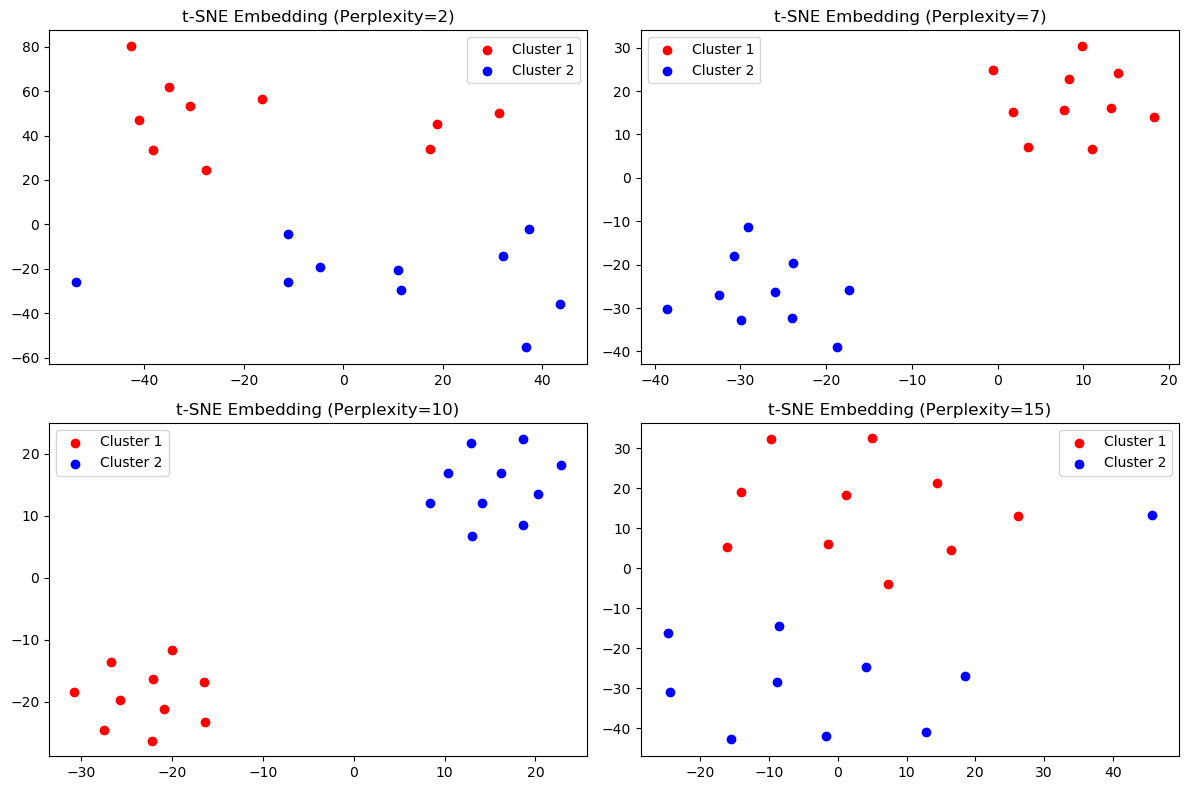

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate the same dataset as before
np.random.seed(0)

# Define parameters
num_clusters = 2
num_samples_per_cluster = 10
dimension = 10

mean_cluster1 = np.ones(dimension)
mean_cluster2 = 10 * np.ones(dimension)

cluster1_data = np.random.multivariate_normal(mean_cluster1, 0.01 * np.identity(dimension), num_samples_per_cluster)
cluster2_data = np.random.multivariate_normal(mean_cluster2, 0.01 * np.identity(dimension), num_samples_per_cluster)

X = np.vstack((cluster1_data, cluster2_data))
y = np.array([0] * num_samples_per_cluster + [1] * num_samples_per_cluster)

# Define perplexity values to experiment with
perplexities = [2,7,10,15]

# Create subplots for each perplexity value
plt.figure(figsize=(12, 8))

for i, perplexity in enumerate(perplexities):
    # Initialize t-SNE with the current perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=0)
    Y = tsne.fit_transform(X)

    # Create a subplot for this perplexity
    plt.subplot(2, 2, i + 1)
    plt.scatter(Y[y == 0, 0], Y[y == 0, 1], label='Cluster 1', c='r')
    plt.scatter(Y[y == 1, 0], Y[y == 1, 1], label='Cluster 2', c='b')
    plt.title(f't-SNE Embedding (Perplexity={perplexity})')
    plt.legend()

plt.tight_layout()
plt.show()
